In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

from numpy import array
from scipy.sparse import csr_matrix


In [56]:
logist_df = pd.read_csv('data/final_fraud_dataset.csv')

cols = logist_df.columns.tolist()
cat_preds_fields = cols[1:2]+cols[4:9]+cols[11:22]+cols[27:28]+cols[31:32]+cols[33:36]+cols[37:38]+cols[39:55]
num_preds_fields = cols[9:11]+cols[22:26]+cols[32:33]+cols[71:72]+cols[73:81]
non_preds_fields = cols[1:4]+ cols[26:27]+cols[28:32]+cols[33:37]+cols[38:39]+cols[55:71]
pred_fields =  cols[72:73]


logist_df[cat_preds_fields]  = logist_df[cat_preds_fields].astype('category')

reorder_cols = non_preds_fields+num_preds_fields + cat_preds_fields

logist_preds_df = logist_df[reorder_cols]
logist_nonpreds_df = logist_df[reorder_cols]
logist_num_preds_df = logist_df[reorder_cols+pred_fields]

#logist_num_preds_df = logist_num_preds_df+cols[72:73]
logist_num_preds_df = logist_num_preds_df.drop(non_preds_fields + cat_preds_fields, axis=1)
logist_nonpreds_df = logist_preds_df.drop(num_preds_fields + cat_preds_fields, axis=1)
logist_preds_df = logist_preds_df.drop(non_preds_fields, axis=1)

In [57]:
#reorder_cols
#cat_preds_fields
#non_preds_fields
logist_num_preds_df.head()

,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,InscClaimAmtReimbursed,DaysAdmitted,Age,NoPhysician,AttendingPhysicianPresent,OtherPhysicianPresent,OperatingPhysicianPresent,NoOfDiag,NoOfProc,NoOfChronicCondition,PotentialFraud
0,12,12,36000,3204,60,70,26000,7,66,1,1,0,0,9,0,7,Yes
1,12,12,19000,1068,100,20,19000,13,95,3,1,1,1,9,2,5,Yes
2,12,12,17000,1068,1050,540,17000,19,87,2,1,0,1,9,1,2,Yes
3,12,12,27000,2136,450,160,13000,5,79,3,1,1,1,7,1,6,Yes
4,12,12,3000,1068,8900,740,3000,5,83,2,1,0,1,1,1,3,Yes


In [58]:
pred_fields

['PotentialFraud']

In [59]:
logist_num_preds_df

,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,InscClaimAmtReimbursed,DaysAdmitted,Age,NoPhysician,AttendingPhysicianPresent,OtherPhysicianPresent,OperatingPhysicianPresent,NoOfDiag,NoOfProc,NoOfChronicCondition,PotentialFraud
0,12,12,36000,3204,60,70,26000,7,66,1,1,0,0,9,0,7,Yes
1,12,12,19000,1068,100,20,19000,13,95,3,1,1,1,9,2,5,Yes
2,12,12,17000,1068,1050,540,17000,19,87,2,1,0,1,9,1,2,Yes
3,12,12,27000,2136,450,160,13000,5,79,3,1,1,1,7,1,6,Yes
4,12,12,3000,1068,8900,740,3000,5,83,2,1,0,1,1,1,3,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,12,12,20000,2136,740,320,12000,8,57,3,1,1,1,9,1,9,No
40470,12,12,5000,1068,2670,360,5000,8,66,3,1,1,1,9,1,7,No
40471,12,12,26790,2136,70,0,14000,9,70,1,1,0,0,9,0,9,No
40472,12,12,10300,1068,5390,1730,10000,1,51,2,1,0,1,8,1,7,No


In [60]:
logist_preds_df.Alive.replace(to_replace = "N", value = 0)

0        0
1        0
2        0
3        0
4        0
        ..
40469    0
40470    0
40471    0
40472    0
40473    0
Name: Alive, Length: 40474, dtype: category
Categories (2, object): [0, Y]

In [61]:
logist_preds_df.Alive.replace(to_replace = "Y", value = 1)

0        N
1        N
2        N
3        N
4        N
        ..
40469    N
40470    N
40471    N
40472    N
40473    N
Name: Alive, Length: 40474, dtype: category
Categories (2, object): [N, 1]

This is a count plot that shows the number of patients that were alive when a claim was filed

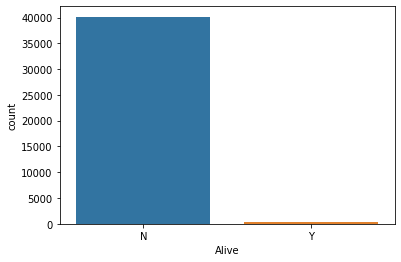

In [62]:
sns.countplot(x='Alive',data=logist_preds_df) 

This is a count plot that shows the number of potential frauds which is our target prediction.

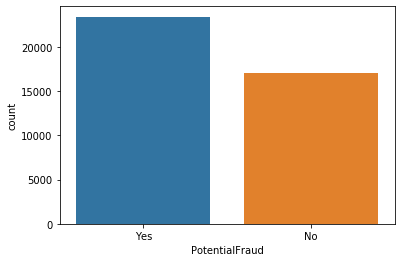

In [63]:
sns.countplot(x='PotentialFraud',data=logist_num_preds_df)


In [64]:
logist_num_preds_df.PotentialFraud

0        Yes
1        Yes
2        Yes
3        Yes
4        Yes
        ... 
40469     No
40470     No
40471     No
40472     No
40473     No
Name: PotentialFraud, Length: 40474, dtype: object

Creating the Test Train Split using SKlearn model selection

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(logist_num_preds_df.drop('PotentialFraud',axis=1), 
                                                    logist_num_preds_df['PotentialFraud'], test_size=0.30, 
                                                    random_state=101)

In [ ]:
Train the model and predict outcome using the LogisticRegression function from SKLearn

In [66]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

To conduct an evaluation of the model we can check precision, recall, and f1-score using clasifiation report

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       0.00      0.00      0.00      5078
         Yes       0.58      1.00      0.74      7065

    accuracy                           0.58     12143
   macro avg       0.29      0.50      0.37     12143
weighted avg       0.34      0.58      0.43     12143



In [69]:
# perform one-hot encoding of the cat_preds_fields (categorical features)
#tmp_df = pd.get_dummies(logist_preds_df[cat_preds_fields],prefix=cat_preds_fields)
#tmp_df = pd.get_dummies(['OperatingPhysician', 'OtherPhysician', 'AttendingPhysician', 'BeneID', 'Provider'],prefix=['OperatingPhysician', 'OtherPhysician', 'AttendingPhysician', 'BeneID', 'Provider'])
#logist_preds_df = pd.concat((logist_preds_df,tmp_df),axis=1) # add back into the dataframe

# replace the current Sex atribute with something slightly more intuitive and readable
#df_imputed['IsMale'] = df_imputed.Sex=='male' 
#df_imputed.IsMale = df_imputed.IsMale.astype(np.int)

#df_imputed.info()

In [70]:
logist_preds_df

,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,InscClaimAmtReimbursed,DaysAdmitted,Age,NoPhysician,...,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5
0,12,12,36000,3204,60,70,26000,7,66,1,...,71590,2724,19889,5849,None,None,None,None,None,None
1,12,12,19000,1068,100,20,19000,13,95,3,...,28489,5854,2753,E9305,None,7769.0,5849.0,None,None,None
2,12,12,17000,1068,1050,540,17000,19,87,2,...,78830,72273,43812,4019,None,9338.0,None,None,None,None
3,12,12,27000,2136,450,160,13000,5,79,3,...,2449,2768,None,None,None,8154.0,None,None,None,None
4,12,12,3000,1068,8900,740,3000,5,83,2,...,None,None,None,None,None,8543.0,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,12,12,20000,2136,740,320,12000,8,57,3,...,2930,78830,1985,0414,None,9955.0,None,None,None,None
40470,12,12,5000,1068,2670,360,5000,8,66,3,...,7904,49121,41401,2639,None,3326.0,None,None,None,None
40471,12,12,26790,2136,70,0,14000,9,70,1,...,5859,51881,V0481,2761,None,None,None,None,None,None
40472,12,12,10300,1068,5390,1730,10000,1,51,2,...,39891,40390,2866,None,None,9390.0,None,None,None,None


In [71]:
cat_preds_fields

['BeneID',
 'Gender',
 'Race',
 'RenalDiseaseIndicator',
 'State',
 'County',
 'ChronicCond_Alzheimer',
 'ChronicCond_Heartfailure',
 'ChronicCond_KidneyDisease',
 'ChronicCond_Cancer',
 'ChronicCond_ObstrPulmonary',
 'ChronicCond_Depression',
 'ChronicCond_Diabetes',
 'ChronicCond_IschemicHeart',
 'ChronicCond_Osteoporasis',
 'ChronicCond_rheumatoidarthritis',
 'ChronicCond_stroke',
 'Alive',
 'Provider',
 'AttendingPhysician',
 'OperatingPhysician',
 'OtherPhysician',
 'ClmAdmitDiagnosisCode',
 'DiagnosisGroupCode',
 'ClmDiagnosisCode_1',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_3',
 'ClmDiagnosisCode_4',
 'ClmDiagnosisCode_5',
 'ClmDiagnosisCode_6',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_8',
 'ClmDiagnosisCode_9',
 'ClmDiagnosisCode_10',
 'ClmProcedureCode_1',
 'ClmProcedureCode_2',
 'ClmProcedureCode_3',
 'ClmProcedureCode_4',
 'ClmProcedureCode_5']

<h2>One Hot Encodding of categorical predictors</h2>

In [72]:
import pandas as pd
tmp_df = pd.DataFrame({'ohe': cat_preds_fields,
                        
        })


tmp_df_2 = pd.get_dummies(tmp_df,drop_first=True)
logist_preds_df = pd.concat((logist_preds_df,tmp_df_2),axis=1) # add back into the dataframe
logist_preds_df.head()
#logist_preds_df.describe()

,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,InscClaimAmtReimbursed,DaysAdmitted,Age,NoPhysician,...,ohe_ClmProcedureCode_5,ohe_County,ohe_DiagnosisGroupCode,ohe_Gender,ohe_OperatingPhysician,ohe_OtherPhysician,ohe_Provider,ohe_Race,ohe_RenalDiseaseIndicator,ohe_State
0,12,12,36000,3204,60,70,26000,7,66,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12,12,19000,1068,100,20,19000,13,95,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12,12,17000,1068,1050,540,17000,19,87,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,12,12,27000,2136,450,160,13000,5,79,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,12,12,3000,1068,8900,740,3000,5,83,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [73]:
logist_preds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 88 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   NoOfMonths_PartACov                  40474 non-null  int64   
 1   NoOfMonths_PartBCov                  40474 non-null  int64   
 2   IPAnnualReimbursementAmt             40474 non-null  int64   
 3   IPAnnualDeductibleAmt                40474 non-null  int64   
 4   OPAnnualReimbursementAmt             40474 non-null  int64   
 5   OPAnnualDeductibleAmt                40474 non-null  int64   
 6   InscClaimAmtReimbursed               40474 non-null  int64   
 7   DaysAdmitted                         40474 non-null  int64   
 8   Age                                  40474 non-null  int64   
 9   NoPhysician                          40474 non-null  int64   
 10  AttendingPhysicianPresent            40474 non-null  int64   
 11  OtherPhysicianP

In [ ]:
Dropping the categorical predictors and leaving only the categorigcal predictors that were hot encoded

In [74]:
logist_preds_df.drop([
 'Gender',
 'Race',
 'RenalDiseaseIndicator',
 'State',
 'County',
 'ChronicCond_Alzheimer',
 'ChronicCond_Heartfailure',
 'ChronicCond_KidneyDisease',
 'ChronicCond_Cancer',
 'ChronicCond_ObstrPulmonary',
 'ChronicCond_Depression',
 'ChronicCond_Diabetes',
 'ChronicCond_IschemicHeart',
 'ChronicCond_Osteoporasis',
 'ChronicCond_rheumatoidarthritis',
 'ChronicCond_stroke',
 'Alive',
 'ClmAdmitDiagnosisCode',
 'DiagnosisGroupCode',
 'ClmDiagnosisCode_1',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_3',
 'ClmDiagnosisCode_4',
 'ClmDiagnosisCode_5',
 'ClmDiagnosisCode_6',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_8',
 'ClmDiagnosisCode_9',
 'ClmDiagnosisCode_10',
 'ClmProcedureCode_1',
 'ClmProcedureCode_2',
 'ClmProcedureCode_3',
 'ClmProcedureCode_4',
 'ClmProcedureCode_5'], inplace=True, axis=1)
#cat_preds_fields

In [75]:
logist_preds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 54 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   NoOfMonths_PartACov                  40474 non-null  int64  
 1   NoOfMonths_PartBCov                  40474 non-null  int64  
 2   IPAnnualReimbursementAmt             40474 non-null  int64  
 3   IPAnnualDeductibleAmt                40474 non-null  int64  
 4   OPAnnualReimbursementAmt             40474 non-null  int64  
 5   OPAnnualDeductibleAmt                40474 non-null  int64  
 6   InscClaimAmtReimbursed               40474 non-null  int64  
 7   DaysAdmitted                         40474 non-null  int64  
 8   Age                                  40474 non-null  int64  
 9   NoPhysician                          40474 non-null  int64  
 10  AttendingPhysicianPresent            40474 non-null  int64  
 11  OtherPhysicianPresent       

In [76]:
logist_preds_df = pd.concat((logist_preds_df, logist_df[pred_fields]),axis=1) # add 'PotentialFraud' back into the dataframe

In [83]:
#Remove NaN fromfrom the data frame
logist_preds_df = logist_preds_df.fillna(0)
logist_preds_df

,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,InscClaimAmtReimbursed,DaysAdmitted,Age,NoPhysician,...,ohe_County,ohe_DiagnosisGroupCode,ohe_Gender,ohe_OperatingPhysician,ohe_OtherPhysician,ohe_Provider,ohe_Race,ohe_RenalDiseaseIndicator,ohe_State,PotentialFraud
0,12,12,36000,3204,60,70,26000,7,66,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes
1,12,12,19000,1068,100,20,19000,13,95,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes
2,12,12,17000,1068,1050,540,17000,19,87,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Yes
3,12,12,27000,2136,450,160,13000,5,79,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Yes
4,12,12,3000,1068,8900,740,3000,5,83,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,12,12,20000,2136,740,320,12000,8,57,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
40470,12,12,5000,1068,2670,360,5000,8,66,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
40471,12,12,26790,2136,70,0,14000,9,70,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
40472,12,12,10300,1068,5390,1730,10000,1,51,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No


Create a Train / Test split using SKlearn model selection, after hot encodding categorical variables 

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(logist_preds_df.drop('PotentialFraud',axis=1), 
                                                    logist_preds_df['PotentialFraud'], test_size=0.20, 
                                                    random_state=101)

In [89]:
X_test

,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,InscClaimAmtReimbursed,DaysAdmitted,Age,NoPhysician,...,ohe_ClmProcedureCode_5,ohe_County,ohe_DiagnosisGroupCode,ohe_Gender,ohe_OperatingPhysician,ohe_OtherPhysician,ohe_Provider,ohe_Race,ohe_RenalDiseaseIndicator,ohe_State
16799,12,12,5000,1068,1120,140,5000,4,89,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26495,12,12,4000,1068,1050,110,4000,3,84,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10764,12,12,4000,1068,0,0,4000,4,89,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33256,12,12,5700,2136,1590,30,5000,8,82,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17477,12,12,12100,1068,330,80,12000,11,87,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10675,12,12,57000,2136,1930,0,50000,13,46,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13307,12,12,8280,1068,20,0,8000,8,46,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15234,12,12,14050,2136,4180,1500,2000,2,76,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35132,12,12,23030,2136,340,80,14000,4,75,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Train the model and predict outcome using the LogisticRegression function from SKLearn

In [90]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

<H2>To conduct an evaluation of the model we can check precision, recall, and f1-score using clasifiation report</h2>

In [92]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       0.00      0.00      0.00      3372
         Yes       0.58      1.00      0.74      4723

    accuracy                           0.58      8095
   macro avg       0.29      0.50      0.37      8095
weighted avg       0.34      0.58      0.43      8095

